In [213]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

In [178]:
df_2015 = pd.read_csv('Happy/2015.csv')
df_2016 = pd.read_csv('Happy/2016.csv')
df_2017 = pd.read_csv('Happy/2017.csv')
df_2018 = pd.read_csv('Happy/2018.csv')
df_2019 = pd.read_csv('Happy/2019.csv')
df_2015.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [265]:
df_2019.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


# Определю как менялся ТОП-10 стран по рейтингу счастья за 5 лет

In [270]:
# Сформирую датафрейм, в котором будет ТОП-10 стран в разрезе 5 лет, для этого рассчитаю среднее значение рейтинга счастья
# по каждой стране за 5 лет

df_2015_r = df_2015[['Country', 'Happiness Score']]
df_2015_r.columns = ['Country', 'Happiness Score']

df_2016_r = df_2016[['Country', 'Happiness Score']]
df_2016_r.columns = ['Country', 'Happiness Score']

df_2017_r = df_2017[['Country', 'Happiness.Score']]
df_2017_r.columns = ['Country', 'Happiness Score']

df_2018_r = df_2018[['Country or region', 'Score']]
df_2018_r.columns = ['Country', 'Happiness Score']

df_2019_r = df_2019[['Country or region', 'Score']]
df_2019_r.columns = ['Country', 'Happiness Score']

In [261]:
#оставлю только 10 стран, с самым большим средним рейтингом
new_df = pd.DataFrame
new_df = pd.concat([df_2015_r, df_2016_r, df_2017_r, df_2018_r, df_2019_r]).reset_index()
top_10 = new_df[['Country', 'Happiness Score']].groupby('Country').mean().sort_values(by = 'Happiness Score', ascending = False).head(10)
top_10 = top_10.reset_index()
top_10

,Country,Happiness Score
0,Denmark,7.5460
1,Norway,7.5410
2,Finland,7.5378
3,Switzerland,7.5114
4,Iceland,7.5110
5,Netherlands,7.4046
6,Canada,7.3506
7,Sweden,7.3192
8,New Zealand,7.3130
9,Australia,7.2762


In [266]:
# Сформирую датафрейм, в котором будут собраны все места по рейтингу
df_2015_rr = df_2015[['Country', 'Happiness Rank']]
df_2015_rr.columns = ['Country', '2015']

df_2016_rr = df_2016[['Country', 'Happiness Rank']]
df_2016_rr.columns = ['Country', '2016']

df_2017_rr = df_2017[['Country', 'Happiness.Rank']]
df_2017_rr.columns = ['Country', '2017']

df_2018_rr = df_2018[['Country or region', 'Overall rank']]
df_2018_rr.columns = ['Country', '2018']

df_2019_rr = df_2019[['Country or region', 'Overall rank']]
df_2019_rr.columns = ['Country', '2019']

In [267]:
# Объединение в один всех сформированных выше датафреймов
m1 = df_2015_rr.merge(df_2016_rr, how = 'outer')
m2 = m1.merge(df_2017_rr, how = 'outer')
m3 = m2.merge(df_2018_rr, how = 'outer')
m4 = m3.merge(df_2019_rr, how = 'outer')

m4

,Country,2015,2016,2017,2018,2019
0,Switzerland,1.0,2.0,4.0,5.0,6.0
1,Iceland,2.0,3.0,3.0,4.0,4.0
2,Denmark,3.0,1.0,2.0,3.0,2.0
3,Norway,4.0,4.0,1.0,2.0,3.0
4,Canada,5.0,6.0,7.0,7.0,9.0
...,...,...,...,...,...,...
165,"Hong Kong S.A.R., China",NaN,NaN,71.0,NaN,NaN
166,Trinidad & Tobago,NaN,NaN,NaN,38.0,39.0
167,Northern Cyprus,NaN,NaN,NaN,58.0,64.0
168,North Macedonia,NaN,NaN,NaN,NaN,84.0


In [268]:
# итоговый дафарейм (ТОП-10), таблицу транспонировал для удобства оформления графиков
top_10_by_year = top_10.merge(m4, how = 'left')
top_10_by_year = top_10_by_year.drop('Happiness Score', axis = 1).set_index('Country').T
top_10_by_year

Country,Denmark,Norway,Finland,Switzerland,Iceland,Netherlands,Canada,Sweden,New Zealand,Australia
2015,3.0,4.0,6.0,1.0,2.0,7.0,5.0,8.0,9.0,10.0
2016,1.0,4.0,5.0,2.0,3.0,7.0,6.0,10.0,8.0,9.0
2017,2.0,1.0,5.0,4.0,3.0,6.0,7.0,9.0,8.0,10.0
2018,3.0,2.0,1.0,5.0,4.0,6.0,7.0,9.0,8.0,10.0
2019,2.0,3.0,1.0,6.0,4.0,5.0,9.0,7.0,8.0,11.0


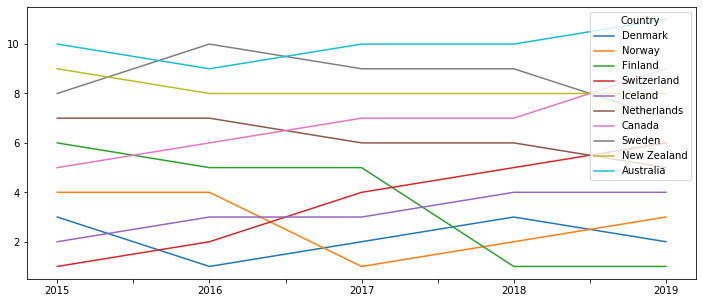

In [269]:
top_10_by_year.plot()

По графику видно, что ТОП-10 стран на протяжении 5 лет не меняется, он стабилен. Внутри ТОП-10 меняются только места стран.
У стран попавших в ТОП-10 предположительно стабильно высокие показатели уровня счастья по всем показателям по отдельности. 

# Проверю зависимость уровня счастья от ВВП на душу

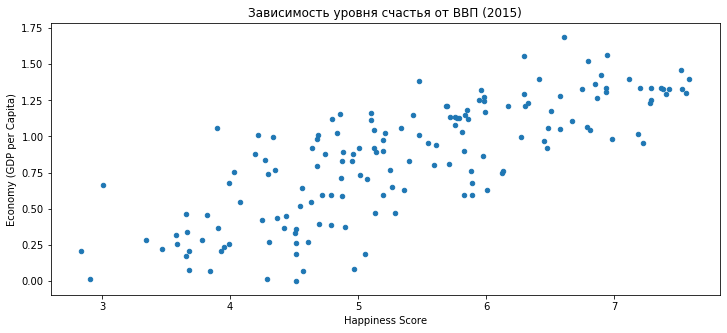

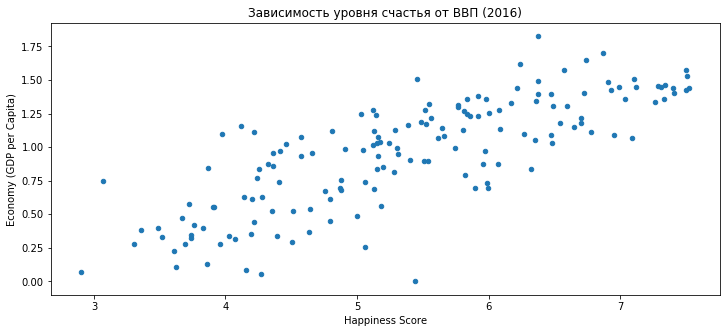

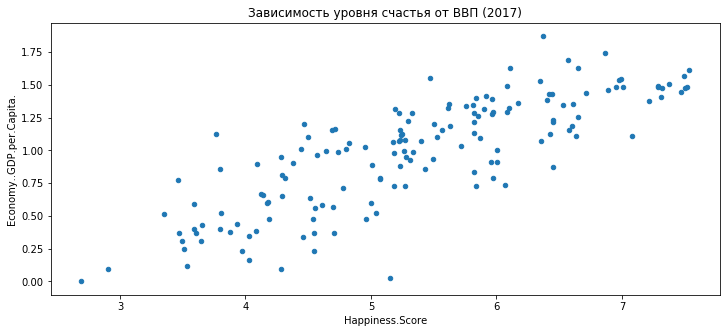

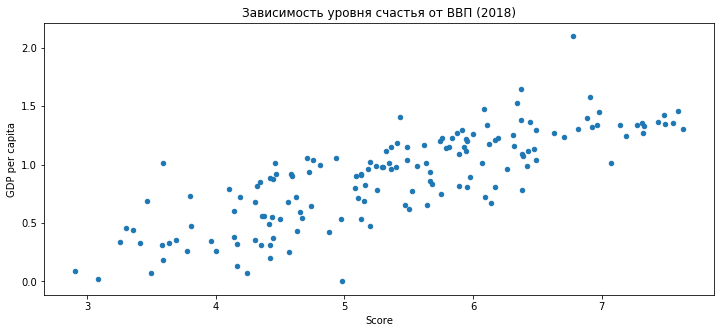

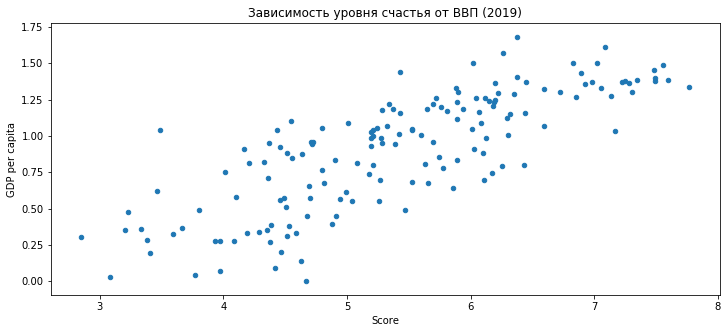

In [76]:
# Определим зависимость уровня счастья от уровня ВВП

df_2015.plot(kind = 'scatter',
            x = 'Happiness Score',
            y = 'Economy (GDP per Capita)',
            title = 'Зависимость уровня счастья от ВВП (2015)'
            )

df_2016.plot(kind = 'scatter',
            x = 'Happiness Score',
            y = 'Economy (GDP per Capita)',
            title = 'Зависимость уровня счастья от ВВП (2016)'
            )

df_2017.plot(kind = 'scatter',
            x = 'Happiness.Score',
            y = 'Economy..GDP.per.Capita.',
            title = 'Зависимость уровня счастья от ВВП (2017)'
            )

df_2018.plot(kind = 'scatter',
            x = 'Score',
            y = 'GDP per capita',
            title = 'Зависимость уровня счастья от ВВП (2018)'
            )

df_2019.plot(kind = 'scatter',
            x = 'Score',
            y = 'GDP per capita',
            title = 'Зависимость уровня счастья от ВВП (2019)'
            )

По точечным графикам выше можно наблюдать наличие линейной зависимости между уровнем счастья и уровнем ВВП на душу населения.
Из чего можно выдвинуть гипотезу, что чем выше уровень ВВП на душу, тем уровень счастья будет выше.
Отдельные выбросы есть во всех годах, но в большинстве случаев наблюдается линейная зависимость между данными показателями.

# Определю в каких регионах расположены страны с наибольшим уровнем счастья

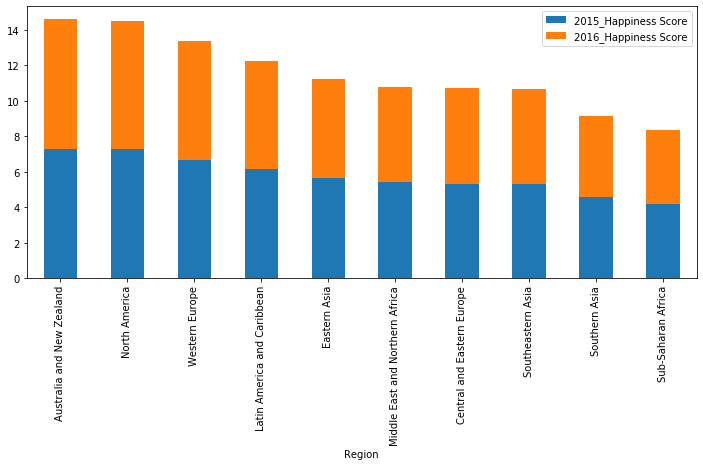

In [140]:
# Определим средний уровень счастья по регионам по годам

d_2015 = df_2015[ [ 'Region', 'Happiness Score']].groupby('Region').mean().sort_values(by='Happiness Score', ascending = False).add_prefix('2015_')
d_2016 = df_2016[ [ 'Region', 'Happiness Score']].groupby('Region').mean().sort_values(by='Happiness Score', ascending = False).add_prefix('2016_')

merge_df = d_2015.merge(d_2016, on = 'Region', how = 'outer')

merge_df.plot(kind='bar',
             stacked = True)


Наибольший средний уровень счастья по двум годам (2015 и 2016 год) у следующих групп стран: Австралия и Новая Зеландия и у стран Северной Америки.
Наименьший средний уровень счастья у стран Африки, расположенных к югу от Сахары. ТОП регионов также соответсвует и странам поотдельности, попавшим в ТОП-10 стран.

# Проанализирую социальную поддержку по странам

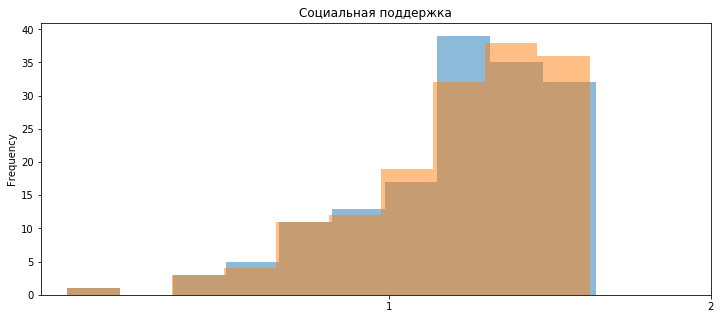

In [177]:
# Проанализируем распределение по странам оценок социальной поддержки в 2018 и 2019 годах.

df_2018['Social support'].plot(kind='hist', 
                   bins=10,
                   title='Социальная поддержка',
                   xticks=range(1, 3),
                   alpha = 0.5)
df_2019['Social support'].plot(kind='hist', 
                   bins=10,
                   title='Социальная поддержка',
                   xticks=range(1, 3),
                   alpha = 0.5)
plt.show()

Оценки социальной поддержки и в 2018 и в 2019 году по большей части стран выставлены выше среднего, наблюдается смещение распределения на правую сторону графика. Низкая оценка социальной поддержки у незначительного количества стран. Можно сделать предположение, что в основном в странах довольны социальной политикой/